## Data Science & Business Analytics Tasks
### Author - Shruti Jagtap
### Task-3 Exploratory Data Analysis
### Dataset - ‘SampleSuperstore’ :  https://bit.ly/3i4rbWl

### Importing necessary library

In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
#from plotnine import *
import warnings
#warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### Reading the dataset

In [4]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Statistical Summary
#### This include the count , mean , the min and max values as well as some percentiles

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking the dupilication in data

In [8]:

data.duplicated().sum()

17

### Drop Duplicates Data

In [9]:
data.drop_duplicates(inplace = True)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#### Deleting the Variable.

In [11]:
col=['Postal Code']
data1=data.drop(columns=col,axis=1)

#### Correlation Between Variables.

In [12]:
data1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


### Data Visualization

### Data Visualization for Discount , Profit , Sale, Quantity

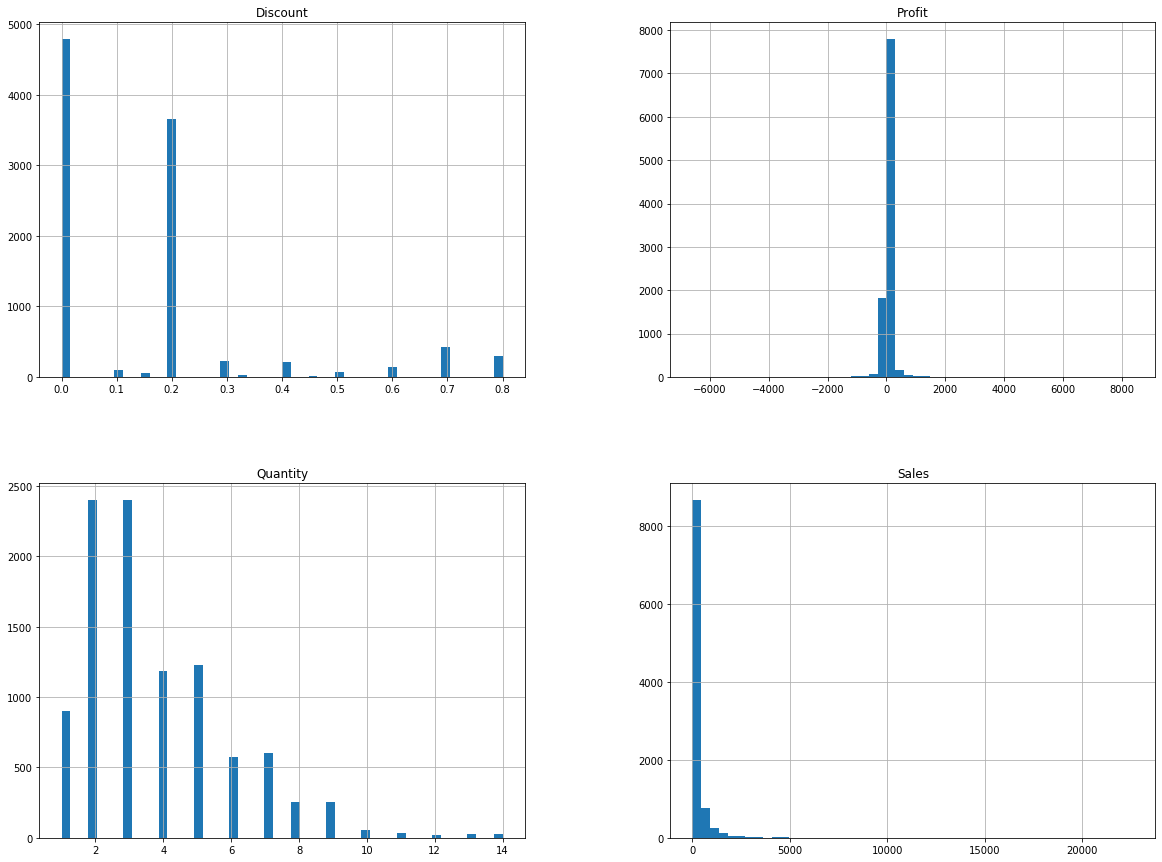

In [13]:
data1.hist(bins=50 ,figsize=(20,15))
plt.show();

### Count Plot For Every State

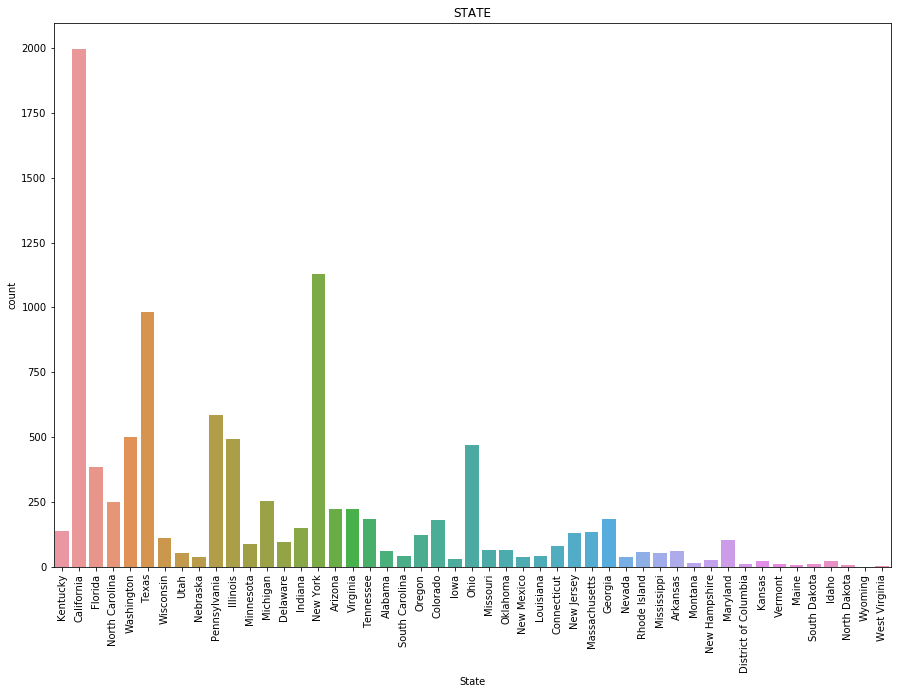

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x=data1['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

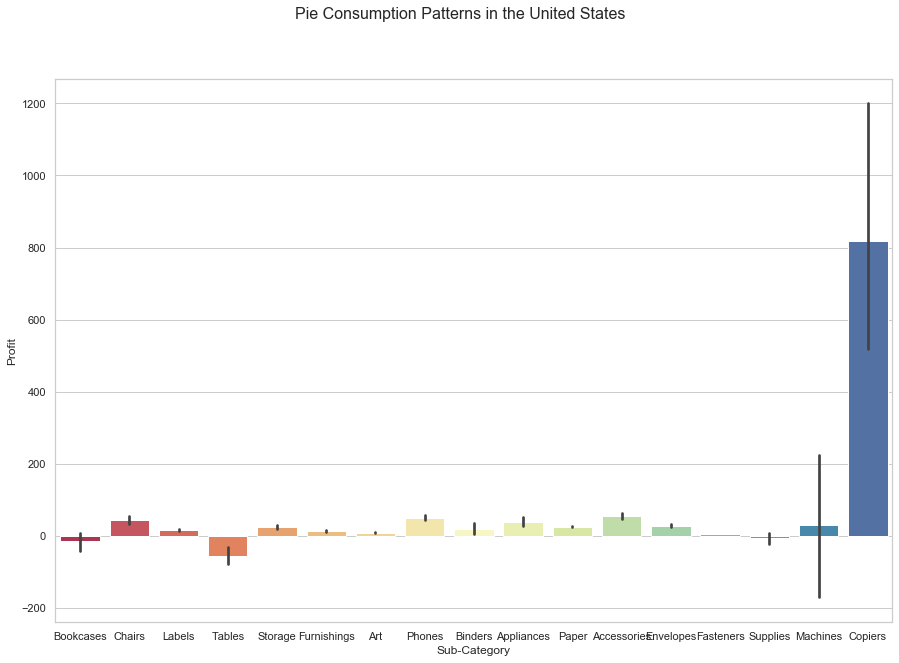

In [32]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(15,10))
sns.barplot(x='Sub-Category',y='Profit', data=sample, palette='Spectral')
plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)
plt.show()

### PairPlot For Sub-Category

<function matplotlib.pyplot.show(*args, **kw)>

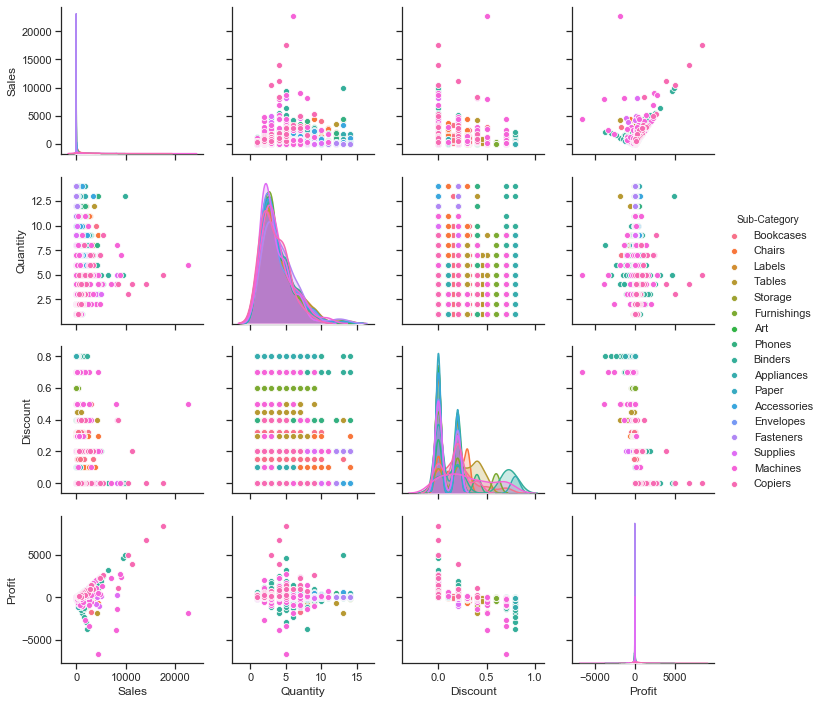

In [76]:
figsize=(15,10)
sns.pairplot(data1,hue='Sub-Category')
plt.show

### Discount VS Profit

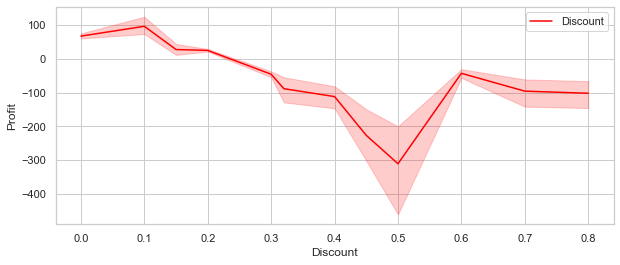

In [40]:
plt.figure(figsize=(10,4))

sns.lineplot('Discount','Profit', data=data1 , color='red',label='Discount')
plt.legend()
plt.show()

### State wise data visualization For Sub-Category 

In [64]:
def state_data_viewer(states):
    product_data = data1.groupby(['State'])
    for state in states:
        data2 = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data2.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

C:\Users\shruti\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


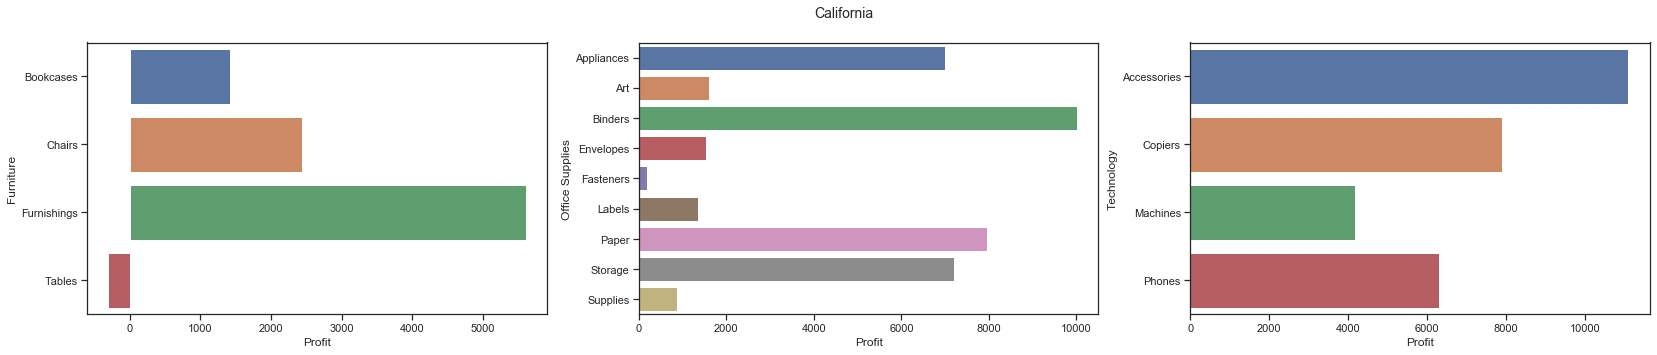

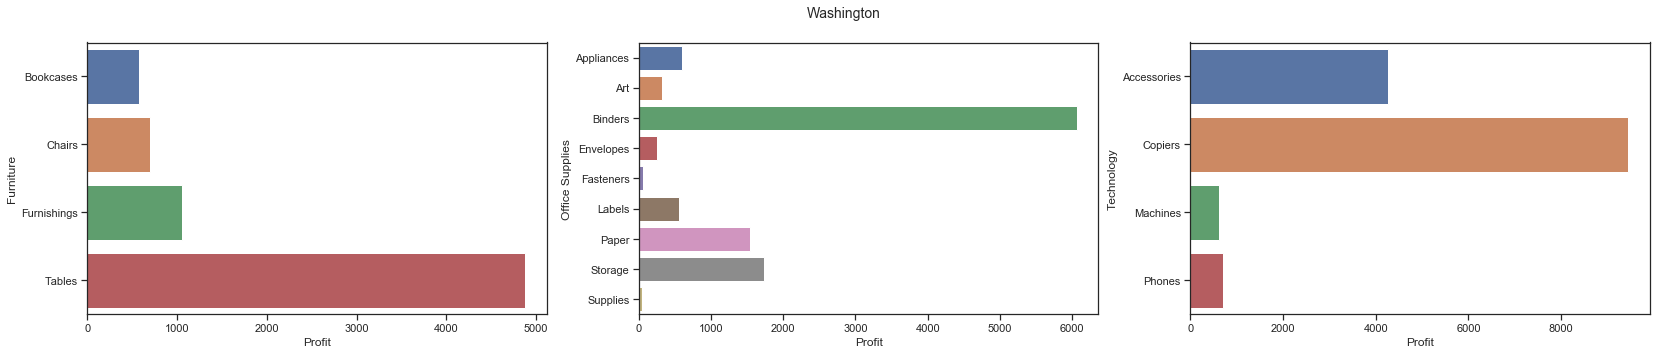

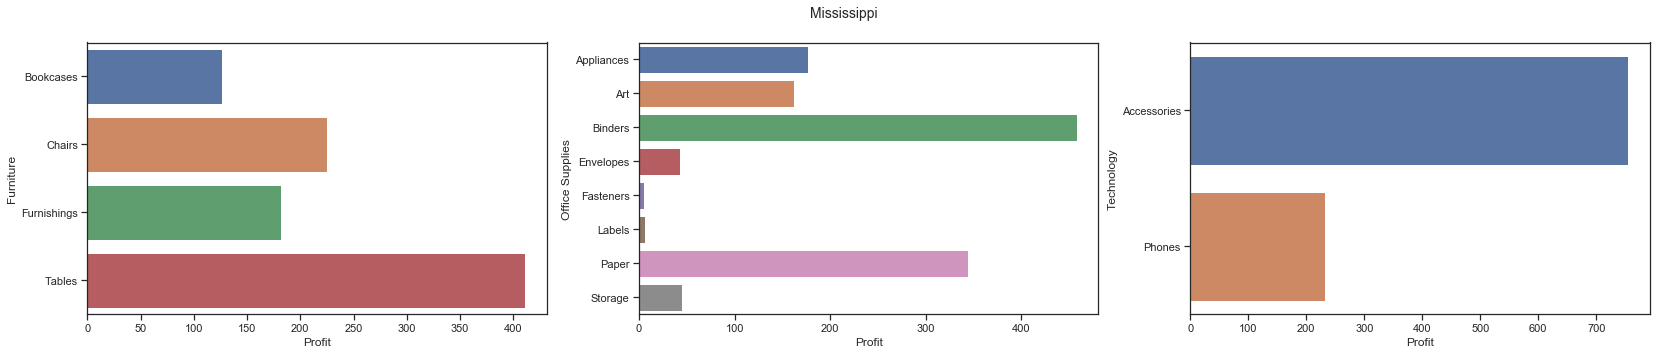

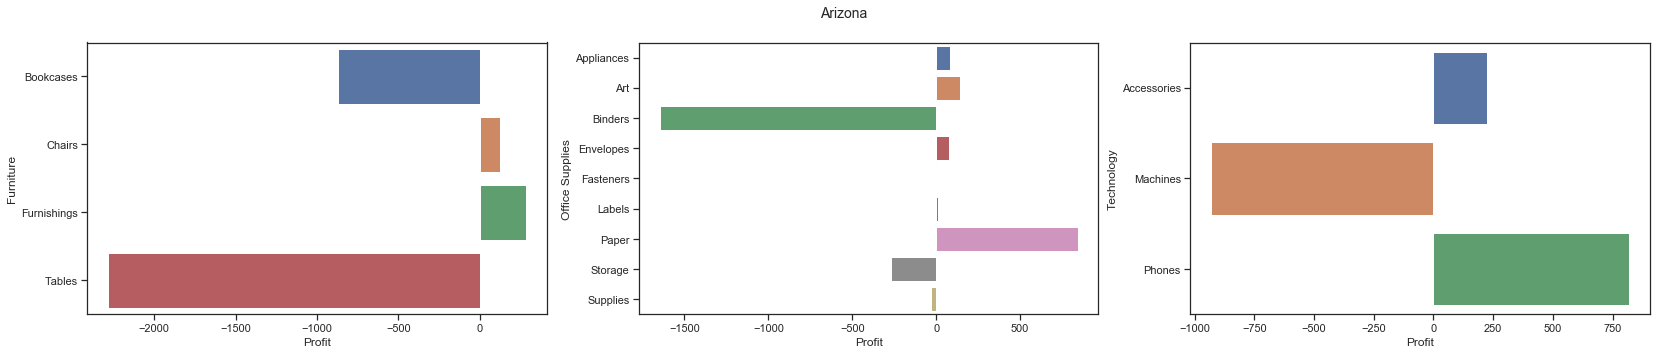

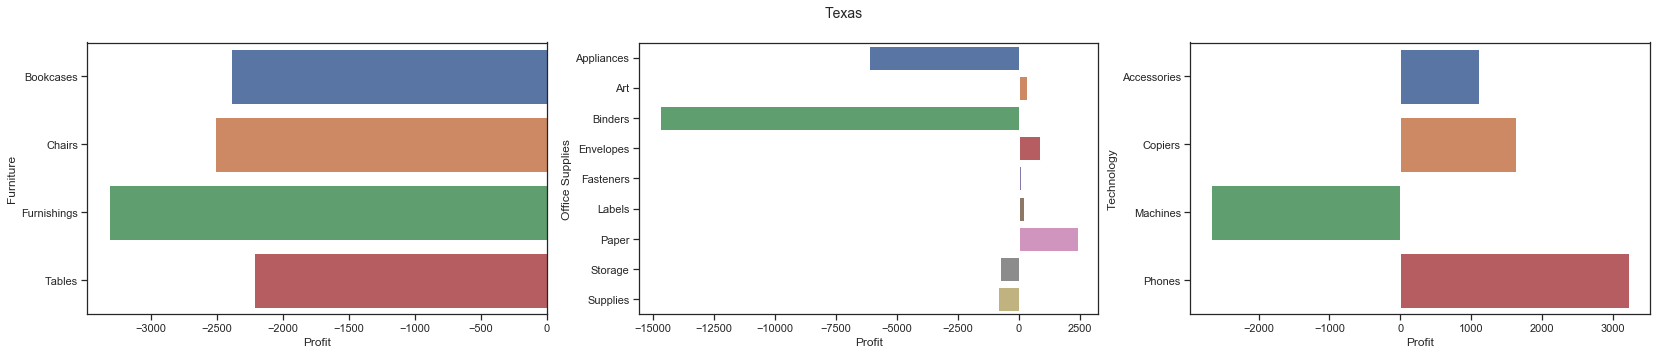

In [65]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

In [66]:
x = sample.iloc[:, [9, 10, 11, 12]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

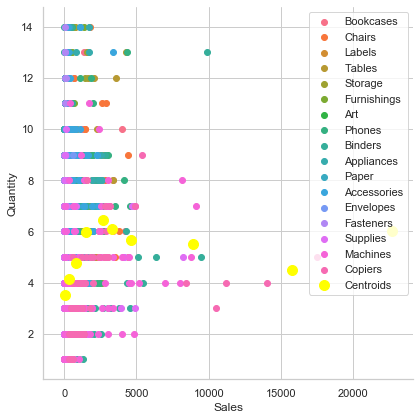

In [67]:
sns.set_style("whitegrid") 
sns.FacetGrid(sample, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

### Sales VS Profit Scatter Plot

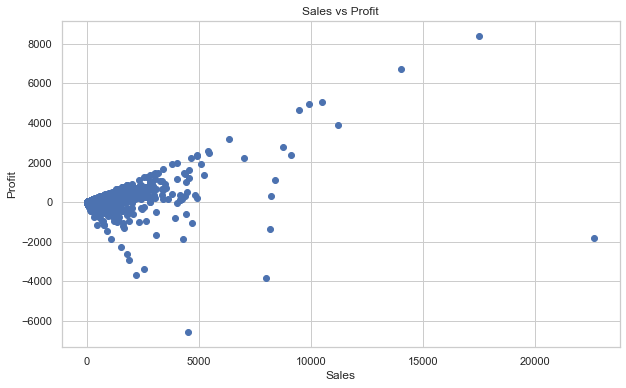

In [68]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(data1["Sales"] , data1["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Sales vs Profit')
plt.show()